# DNNにおけるrelu関数の導入

【内容】  
- 5層のDNNでMNIST(数字画像)データの分類器を実装する
- 活性化関数をreluにする

【目標】  
- 活性化関数をrelu関数にすることで、層が深くなっても勾配消失しないことを確認する  
（relu関数で不活性となってしまう現象は研修用コードにて実演）
- relu関数では比較的早く学習が進むことを確認する

## ライブラリのインポート

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.initializers import TruncatedNormal
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

#tensorflowの互換性WARNING文の回避
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.FATAL)

np.random.seed(1234)


Using TensorFlow backend.


## データの生成

In [2]:
# 研修用データロード
from mldata import mldata
X,Y,X_train, X_test, Y_train, Y_test = mldata.mldata()

In [3]:
# # データロード
# # 使用するときは「ctrl+/」でコメントを外す

# mnist = datasets.fetch_openml('MNIST_784', version=1, return_X_y=False)

# n = len(mnist.data)
# N = 10000  # MNISTの一部を使う
# indices = np.random.permutation(range(n))[:N]  # ランダムにN枚を選択

# X = mnist.data[indices]
# y = mnist.target[indices]
# Y = np.eye(10)[y.astype(int)]  # 1-of-K 表現に変換

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)


In [3]:
# 読み込んだデータをそのまま表示。28*28の整数値が格納されている。
print(X_train[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  43.   0.
   0.   0.   0.   0.   0.   0.  51. 150. 240. 255. 150.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   6.  94.  15.
   0.   0.   0.   0.  12.  94. 238. 253. 253. 253. 192.   0.   0.   0.
   0. 

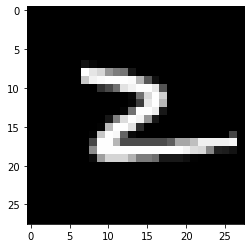

In [4]:
# X_trainの先頭のデータを表示
img = X_train[2]
plt.imshow(img.reshape((28,28)),cmap='Greys_r')

## モデル設定(TODO)

In [5]:
n_in = len(X[0])  # 784
n_hidden = 200
n_out = len(Y[0])  # 10

model = Sequential()
model.add(Dense(n_hidden, input_dim=n_in, kernel_initializer=TruncatedNormal(stddev=0.01,seed=1234)))
model.add(Activation('relu'))

model.add(Dense(n_hidden,  kernel_initializer=TruncatedNormal(stddev=0.01,seed=1234)))
model.add(Activation('relu'))

model.add(Dense(n_hidden,  kernel_initializer=TruncatedNormal(stddev=0.01,seed=1234)))
model.add(Activation('relu'))

model.add(Dense(n_hidden,  kernel_initializer=TruncatedNormal(stddev=0.01,seed=1234)))
model.add(Activation('relu'))

model.add(Dense(n_out,  kernel_initializer=TruncatedNormal(stddev=0.01,seed=1234)))
model.add(Activation('softmax'))

# Denseの入力次元、出力次元は全て'n_hidden'
# Activationは'relu'
# 最終層のActivationは'softmax'
# 各Denseで重みを正規化
# →kernel_initializer=TruncatedNormal(stddev=0.01,seed=1234)
# 入力次元の記載は省略
# 同じ記載を繰り返し、中間層を重ねていく

model = Sequential()
model.add(Dense(n_hidden, input_dim=n_in))
model.add(# WRITE ME
)

model.add(# WRITE ME
)
model.add(# WRITE ME
)

model.add(# WRITE ME
)
model.add(# WRITE ME
)

model.add(# WRITE ME
)
model.add(# WRITE ME
)

model.add(Dense(n_out))
model.add(# WRITE ME
)

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01),
              metrics=['accuracy'])


In [6]:
# モデルのサマリを確認する
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
activation_2 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
activation_3 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
__________

## モデル学習

In [7]:
# epochs = 100
epochs = 50  # ReLU では学習が早く進む
batch_size = 200

model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size)


Epoch 1/50
8000/8000 [==============================] - 1s 105us/step - loss: 2.3025 - acc: 0.1274
Epoch 2/50
8000/8000 [==============================] - 0s 50us/step - loss: 2.3021 - acc: 0.1164
Epoch 3/50
8000/8000 [==============================] - 0s 40us/step - loss: 2.3017 - acc: 0.1157
Epoch 4/50
8000/8000 [==============================] - 0s 47us/step - loss: 2.3014 - acc: 0.1157
Epoch 5/50
8000/8000 [==============================] - 0s 47us/step - loss: 2.3009 - acc: 0.1157
Epoch 6/50
8000/8000 [==============================] - ETA: 0s - loss: 2.3004 - acc: 0.117 - 0s 44us/step - loss: 2.3005 - acc: 0.1157
Epoch 7/50
8000/8000 [==============================] - 0s 52us/step - loss: 2.3000 - acc: 0.1157
Epoch 8/50
8000/8000 [==============================] - 1s 95us/step - loss: 2.2994 - acc: 0.1157
Epoch 9/50
8000/8000 [==============================] - 1s 76us/step - loss: 2.2986 - acc: 0.1157
Epoch 10/50
8000/8000 [==============================] - 1s 91us/step - loss: 2

## 予測精度の評価

In [8]:
loss_and_metrics = model.evaluate(X_test, Y_test)
print(loss_and_metrics)

2000/2000 [==============================] - 0s 100us/step
[0.26942603665590287, 0.929]
